# MAC0219 EP2 - Cuda & OpenMPI


|                Nome              |   NUSP   |
|----------------------------------|----------|
| Eduardo Freire de Carvalho Lima  | 10262627 |
| Kaique Kazuyoshi Komata          | 10297741 |
| Lucas Civile Nagamine            |  7083142 |
| Victor Hugo Miranda Pinto        | 10297720 |
| Yurick Yussuke Honda             | 10258984 |


## Experimento

O objetivo do experimento é utilizar a experiência com análise de desempenho de programas paralelos, adquirida no
EP1, para planejar e analisar experimentos para determinar parâmetros de configuração de implementações
CUDA e OpenMPI (OMPI) do cálculo do fractal de Mandelbrot.

O experimento é composto pelos códigos implementados no EP1 (sequencial, Pthreads e OMP) e duas novas versões: Cuda e OMPI. Todas as execuções devem respeitar alguns parâmetros fixos: repetições = 15, tamanho da imagem = 4096 e região do conjunto de Mandelbrot = Triple Spiral Valley. Dessa maneira, as variáveis para cada uma das versões a ser comparadas são:

- Sequencial (mandelbrot_seq.c e mandelbrot_seq_sem.c): presença e ausência de alocação de memória e operações de entrada/saída;
- Pthreads (mandelbrot_pth.c): número de threads ($2^0$ a $2^5$);
- OpenMP (mandelbrot_omp.c): número de threads ($2^0$ a $2^5$);
- Cuda (mandelbrot_cuda.c): dimensões do grid ($x, y$) e dos blocos;
- OMPI (mandelbrot_ompi.c): número de processos ($1, 8, 16, 32$ e $64$);
- OMPI + OpenMP (mandelbrot_mpi_ompi.c): número de processos ($1, 8, 16, 32$ e $64$) e número de threads ($2^0 a 2^5$).

Para automatizar alguns dos processos deste experimento, utilizamos o script run_measurements.sh.

## Relatório

Primeiramente, rodamos o comando na célula abaixo para instalar e atualizar os pacotes e dependências necessários para a execução dos scripts desse notebook:

In [6]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

   Updating `~/Documents/College/EPs/MAC0219/EP2/Project.toml`
 [no changes]
   Updating `~/Documents/College/EPs/MAC0219/EP2/Manifest.toml`
 [no changes]


Depois, rodamos a célula abaixo para verificar os status dos pacotes e ver se há algum problema neles:

In [7]:
] st

Status `~/Documents/College/EPs/MAC0219/EP2/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.2
  [91a5bcdd] Plots v1.4.3


Após isso, entramos no modo shell para rodar o script <i>run_measurements.sh</i>, que irá compilar todos os arquivos em C que calculam o Conjunto de Mandelbrot, executar todos os experimentos necessários para os arquivos do EP1 e calcular os tempos de execução com o comando <i>perf stat</i> do Linux. Como o script roda todos os experimentos de uma única vez, sua execução pode demorar algum tempo:

In [6]:
; ./run_measurements.sh

make: Nothing to be done for 'all'.


+ MEASUREMENTS=15
+ THREADS_ITERATIONS=6
+ INITIAL_THREADS=1
+ THREADS=1
+ SIZE=4096
+ NAMES1=('mandelbrot_seq' 'mandelbrot_seq_sem')
+ NAMES2=('mandelbrot_pth' 'mandelbrot_omp')
+ make
+ mkdir results
mkdir: cannot create directory ‘results’: File exists
+ for NAME in ${NAMES1[@]}
+ perf stat -r 15 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 4096
+ mv mandelbrot_seq.log results
+ rm output.ppm
+ for NAME in ${NAMES1[@]}
+ perf stat -r 15 -n ./mandelbrot_seq_sem -0.188 -0.012 0.554 0.754 4096
+ mv mandelbrot_seq_sem.log results
+ rm output.ppm
rm: cannot remove 'output.ppm': No such file or directory
+ for NAME in ${NAMES2[@]}
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 4096 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 4096 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 4096 4


Ainda no modo shell, rodamos o script <i>ompi_script.sh</i> para calcular o Conjunto de Mandelbrot e executar os experimentos necessários para o programa paralelizado com OMPI e para o programa paralelizado com OMPI + OpenMP:

In [8]:
; ./ompi_script.sh

mpicc -o mandelbrot_ompi mandelbrot_ompi.c


+ MEASUREMENTS=15
+ SIZE=4096
+ PROCESSES=(1 8 16 32 64)
+ INITIAL_THREADS=1
+ THREADS=1
+ THREADS_ITERATIONS=6
+ make


mpicc -o mandelbrot_mpi_ompi mandelbrot_mpi_ompi.c


+ '[' '!' -d results ']'
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:1 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:8 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:16 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:32 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ for PROCESS in ${PROCESSES[@]}
+ perf stat -r 15 -n mpirun -H localhost:64 ./mandelbrot_ompi -0.188 -0.012 0.554 0.754 4096
+ mv mandelbrot_ompi.log results
+ for PROCESS in ${PROCESSES[@]}
+ (( i=1 ))
+ (( i<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n mpirun -H localhost:1 ./mandelbrot_mpi_ompi -0.188 -0.012 0.554 0.754 4096 1
+ THREADS=2
+ (( i++ ))
+ (( i<=THREADS_ITERATIONS ))
+ perf stat -r 15 -n mpirun -H localhost:1 ./mandelbrot_mpi_ompi -0.188 -0.012 0.554 0.

Na célula abaixo é definida a função <i>confidence_interval</i>, que faz o cálculo de intervalo de confiança e irá ser utilizada na manipulação dos resultados e na construção do DataFrame.

In [7]:
function confidence_interval(sd)
    return Float64(1.96) * sd / Float64(sqrt(10))
end

confidence_interval (generic function with 1 method)

O script <i>run_measurements</i> criará pastas com arquivos log que contém os resultados dos experimentos  <b>relativos às implementações do EP1</b>. Para podermos analisar esses resultados e produzir gráficos, executamos o código da célula abaixo para ler todos os arquivos log, extrair as informações que queremos e criar um CSV (results.csv) a partir delas.

In [8]:
using Printf

function mean_and_ci_from_line(line)
    mean, ci, count = 0, 0, 0
    for token in split(line, " ")
        num = tryparse(Float64, replace(replace(token, "%" => ""), "," => "."))
        if num !== nothing
            count += 1
            if count == 1
                mean = num
            else
                sd = mean * num / Float64(100)
                ci = confidence_interval(sd)
            end
        end
        if count >= 2 break end
    end
    return mean, ci
end
    
function log_to_csv(script, csv_file, threads_enabled)
    log_path = @sprintf("results/%s.log", script)
    threads = 1
    mean, ci = 0, 0
    
    open(log_path) do log_file
        for (i, line) in enumerate(eachline(log_file))
            if (i + 1) % 5 != 0 continue end
    
            mean, ci = mean_and_ci_from_line(line)
            
            write(csv_file, @sprintf("%s,%d,%.9F,%.9F\n", script, threads, mean, ci))  
            if threads_enabled threads *= 2 end
        end
    end
end
    
function log_to_csv_handler(scripts)
    csv_file = open("results_ep1.csv", "w")
    write(csv_file, "script,threads,mean,ci\n")
    
    for script in scripts
        threads_enabled = !startswith(script, "mandelbrot_seq")
        log_to_csv(
            script,
            csv_file,
            threads_enabled
        ) 
    end
    
    close(csv_file)
end

scripts = ["mandelbrot_seq", "mandelbrot_seq_sem", "mandelbrot_pth", "mandelbrot_omp"]
log_to_csv_handler(scripts)

Então, obtemos um dataframe a partir do CSV gerado.

In [4]:
using CSV

df = CSV.read("results_ep1.csv")

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260


14×4 DataFrames.DataFrame
│ Row │ script             │ threads │ mean    │ ci         │
│     │ String             │ Int64   │ Float64 │ Float64    │
├─────┼────────────────────┼─────────┼─────────┼────────────┤
│ 1   │ mandelbrot_seq     │ 1       │ 24.0919 │ 0.0268782  │
│ 2   │ mandelbrot_seq_sem │ 1       │ 23.1015 │ 0.0114548  │
│ 3   │ mandelbrot_pth     │ 1       │ 23.3108 │ 0.00433445 │
│ 4   │ mandelbrot_pth     │ 2       │ 12.7285 │ 0.00394459 │
│ 5   │ mandelbrot_pth     │ 4       │ 8.21261 │ 0.0066173  │
│ 6   │ mandelbrot_pth     │ 8       │ 7.77238 │ 0.0101165  │
│ 7   │ mandelbrot_pth     │ 16      │ 7.79411 │ 0.0251204  │
│ 8   │ mandelbrot_pth     │ 32      │ 7.7193  │ 0.00526292 │
│ 9   │ mandelbrot_omp     │ 1       │ 23.2023 │ 0.00287619 │
│ 10  │ mandelbrot_omp     │ 2       │ 12.6656 │ 0.00235507 │
│ 11  │ mandelbrot_omp     │ 4       │ 7.69942 │ 0.0167025  │
│ 12  │ mandelbrot_omp     │ 8       │ 7.62807 │ 0.0189117  │
│ 13  │ mandelbrot_omp     │ 16      │ 7.59968 │ 0.00753653 │
│ 14  │ mandelbrot_omp     │ 32      │ 7.63577 │ 0.00804559 │

## Análise

Após construir o DataFrame com os dados, podemos iniciar a contrução dos gráficos e análise deles.<br>

Primeiramente será feita uma análise separada para cada código executado, comparando os resultados nos diferentes parâmetros e depois, será feita uma análise comparando os resultados entre os códigos, relacionando-os.

### Sequencial

In [ ]:
using Plots

function plot_seq(data)
    plt = plot(
        title = "Performance das versões sequenciais",
        ylabel = "Tempo de execução (s)",
    )
    scatter!(
        ["Com I/O\ne malloc", "Sem I/O\ne malloc"],
        data.mean,
        yerror = data.ci,
        label = nothing,
        position = :center
    )
    display(plt)
end

plot_seq(filter(row -> startswith(row.script, "mandelbrot_seq"), df))

### Pthreads

Como os parâmetros para o experimento são fixos dessa vez, com exceção do número de threads, iremos analisar os resultados do programa paralelizado com pthreads focando apenas nas médias do tempo de execução e no número de threads.

A função <i>plot_pth</i> definida abaixo recebe um conjunto de dados e constrói um gráfico que relaciona a média do tempo de execução no eixo Y com o número de threads no eixo X:

In [5]:
using Plots
function plot_pth(data, name, yticksMax)
    
    fig = plot(size=(800,800), xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name)
         
    scatter!(
        data.threads[1:size(data, 1)],
        data.mean[1:size(data, 1)],
        yerror = data.ci[1:size(data, 1)]
    )  
    return fig
end 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


plot_pth (generic function with 1 method)

### OpenMP

### OMPI

### CUDA

### OMPI + OMP

# A PARTIR DAQUI TÁ IGUAL AO EP1. DESCONSIDERAR.

### Sequencial

A função <i>plot_sequencial</i> recebe as partições dos conjuntos de dados referentes aos códigos sequenciais e constrói os gráficos que relacionam as médias dos tempos de execução com as regiões do Conjunto de Mandelbrot para cada tamanho de imagem.

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


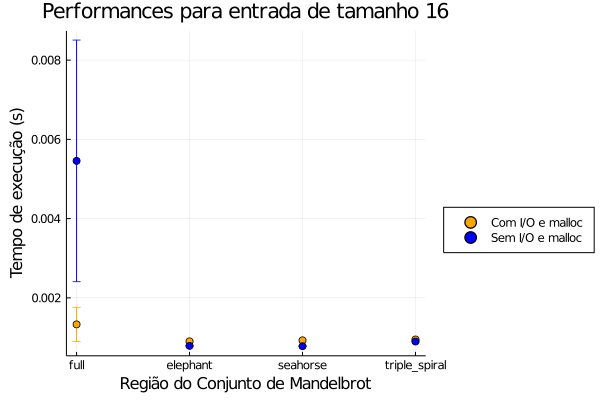

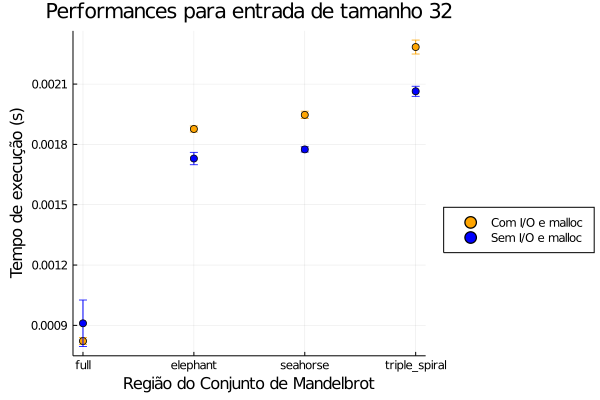

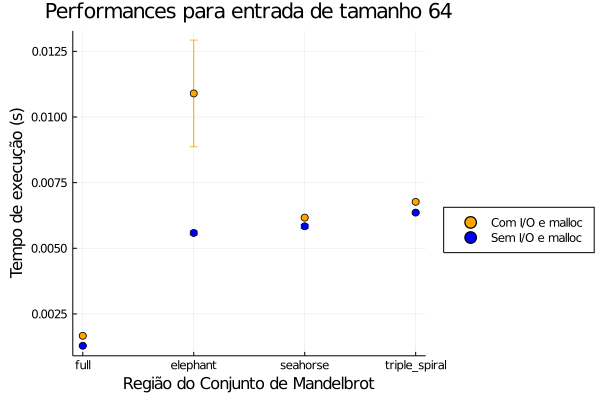

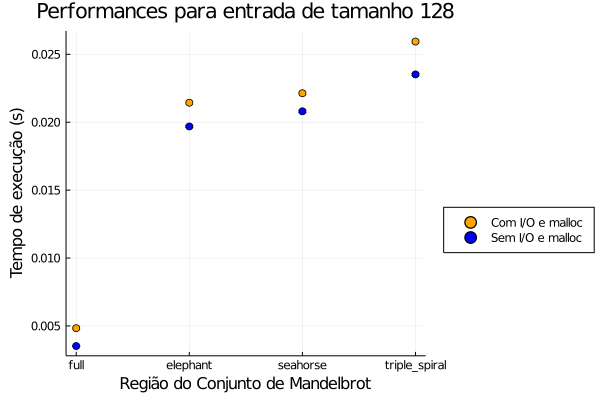

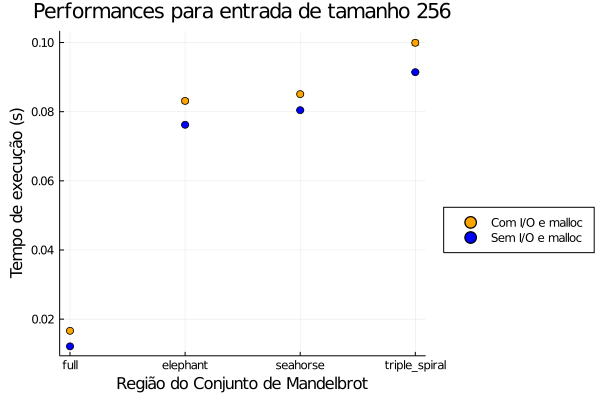

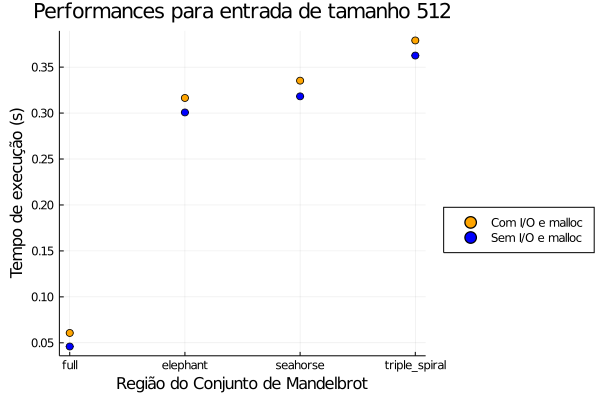

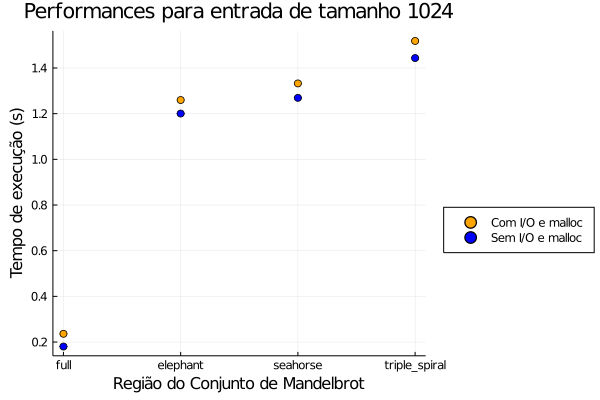

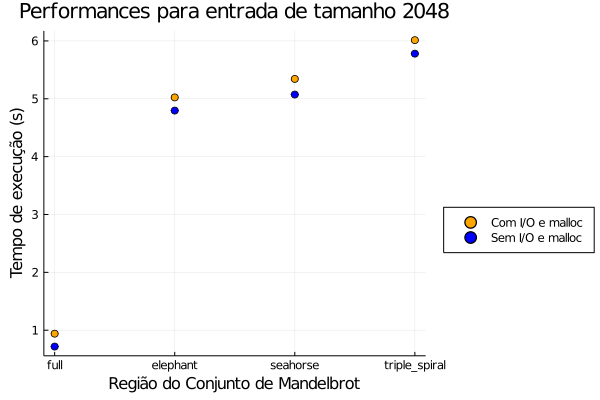

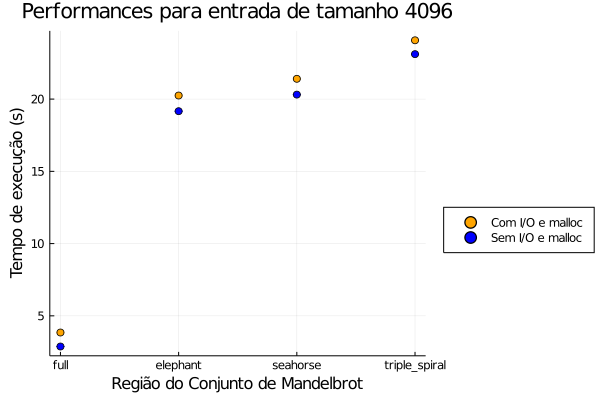

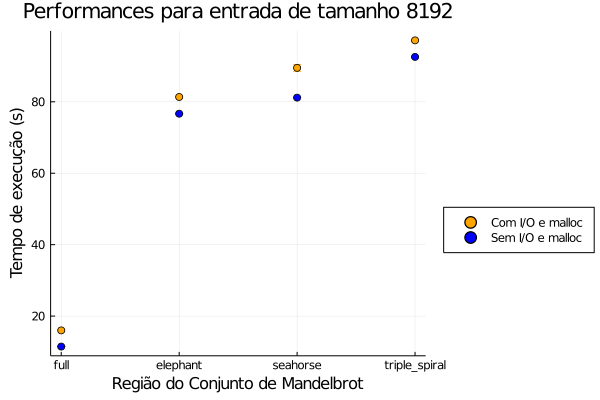

In [27]:
using Plots

function plot_sequencial(size, with_io_malloc, without_io_malloc)
    plt = plot(
        title = @sprintf("Performances para entrada de tamanho %d", size),
        xlabel = "Região do Conjunto de Mandelbrot",
        ylabel = "Tempo de execução (s)",
        legend = :outerright
    )
    scatter!(
        with_io_malloc[!, "region"],
        with_io_malloc[!, "mean"],
        yerror = with_io_malloc[!, "ci"],
        color = "orange",
        label = "Com I/O e malloc",
    )
    scatter!(
        without_io_malloc[!, "region"],
        without_io_malloc[!, "mean"],
        yerror = without_io_malloc[!, "ci"],
        color = "blue",
        label = "Sem I/O e malloc",
    )
    display(plt)
end

function charts_sequencial(data)
    for i = 4:13
        size = 2^i
        plot_sequencial(
            size,
            filter(row -> row["img_size"] == size && row["script"] == "mandelbrot_seq", data),
            filter(row -> row["img_size"] == size && row["script"] == "mandelbrot_seq_sem", data),
        )
    end
end

charts_sequencial(df)

#### Tamanho da Entrada

Anteriormente à execução dos experimentos e obtenção dos resultados, nós analisamos o código e chegamos à conclusão de que o tamanho da entrada (lê-se tamanho da imagem gerada em pixels) seria determinante para o tempo de execução. Não é necessária uma análise profunda do algoritmo para estimar que, para uma mesma quantidade de threads (no caso da implementação sequencial, uma) e a mesma região do Conjunto de Mandelbrot, o tempo de execução do código se torna proporcional ao quadrado do parâmetro de tamaho da imagem. Ou seja, quando dobramos o tamanho, multiplicamos por quatro o tempo gasto.

Em linhas gerais, isso ocorre devido à iteração por cada um dos pixels da imagem (cuja quantidade é igual ao quadrado do parâmetro passado). Ainda há outros fatores a serem considerados, como a região do conjunto e o número máximo de iterações, mas os estamos tomando como constantes, uma vez que isso facilita a avaliação o impacto individual do tamanho da entrada sobre o tempo de execução.

Uma vez que realizamos os experimentos e obtivemos os resultados, pudemos observar uma clara convergência entre nossa hipótese e os tempos registrados. Para evidenciar essa convergência, seguem os dados aproximados relativos à implementação sequencial sem I/O e alocação de memória para a região Triple Spiral, com diferentes tamanhos de imagem:

| Tamanho da imagem (px) | Tempo médio (s) | Aumento em relação ao tempo obtido com o tamanho de entrada anterior |
|------------------------|-----------------|----------------------------------------------------------------------|
| 16                     | 0,000898        | -                                                                    |
| 32                     | 0,002064        | 2,298                                                                |
| 64                     | 0,006359        | 3,080                                                                |
| 128                    | 0,023518        | 3,698                                                                |
| 256                    | 0,091430        | 3,889                                                                |
| 512                    | 0,362594        | 3,966                                                                |
| 1024                   | 1,443504        | 3,981                                                                |
| 2048                   | 5,779933        | 4,004                                                                |
| 4096                   | 23,110561       | 3,998                                                                |
| 8192                   | 92,568699       | 4,005                                                                |

Pela tabela acima, é visível o crescimento de tempo médio conforme aumentamos o tamanho da entrada. Principalmente a partir dos 256 px, podemos observar com clareza que, ao dobrarmos a entrada, multiplica-se por quatro o tempo médio de execução. Nosso palpite para a proporção menor observada no crescimento de tempo para as entradas pertencentes a [16, 32, 64, 128] é que, na execução do programa com essas entradas menores, as operações não proporcionais ao tamanho da entrada (como a função init()) tomam uma fatia significativa do tempo de execução e, portanto, ainda não se consegue observar a proporcionalidade entre o tempo de execução e o quadrado da entrada.


#### Região do Conjunto de Mandelbrot

À diferença do tamanho da entrada, não foi tão simples determinar o impacto da região do Conjunto de Mandelbrot sobre o tempo de execução do programa. Após uma análise mais detalhada do código, chegamos a duas conclusões:

1. No geral, regiões que englobam intervalos maiores (ou seja, cujas diferenças c_x_max - c_x_min e c_y_max - c_y_min são grandes) tendem a requerer menor tempo de execução, uma vez que as dimensões de cada pixel são maiores e, portanto, o número de iterações necessárias para se determinar o valor de cada pixel é menor;

1. Para regiões de intervalos pequenos, é provável que o número de iterações original ultrapasse a constante iteration_max. Logo, há um "lower bound" sob o qual todas as dimensões de pixel serão calculadas com o mesmo número máximo de iterações.

As duas conclusões acima nos permitem afirmar, então, que, até certo limite, regiões menores resultam em menor tempo de execução. Ultrapassado esse limite, essa proporcionalidade passa a não ser mais válida.

De fato, ao executarmos os experimentos e obtermos os resultados, nossas conclusões foram confirmadas: a região Full, de muito maior abrangência que as outras, apresentou tempo de execução bastante menor. De resto, estabeleram-se, em ordem crescente de tempo, Elephant, SeaHorse e Triple Spiral - com uma variação bem menor entre elas. A tabela a seguir, relativa aos dados obtidos na implementação sem I/O e alocação de memória para as entradas de tamanho 4096 e 8192, evidencia as informações apresentadas:

| Tamanho da imagem (px) | Região        | Tempo médio (s) |
|------------------------|---------------|-----------------|
| 4096                   | Full          | 2.876689        |
| 4096                   | Elephant      | 19.162230       |
| 4096                   | Seahorse      | 20.310213       |
| 4096                   | Triple Spiral | 23.110561       |
| 8192                   | Full          | 11.462339       |
| 8192                   | Elephant      | 76.665872       |
| 8192                   | Seahorse      | 81.164191       |
| 8192                   | Triple Spiral | 92.568699       |

Dessa tabela, observa-se que Full tem tempo médio bastante inferior (equivale a cerca de 15% de Elephant para ambos os tamanhos de imagem), enquanto as outras regiões apresentam dados mais próximos: Elephant leva tempo equivalente a 94% de Seahorse, que leva cerca de 87% do tempo de Triple Spiral.

#### I/O e Alocação de Memória

Antes de executarmos os experimentos e avaliarmos os seus resultados, presumíamos que as operações de I/O e alocação de memória tomariam tempo não desprezível. Portanto, conforme nossa linha de raciocínio, performances razoavelmente melhores seriam obtidas uma vez que os trechos de código relativos a essas operações fossem retirados.

Nossas previsões se mostraram corretas: executamos o código sequencial (mandelbrot_seq.c) incluindo e excluindo as operações supracitadas e, de fato, obtivemos resultados melhores na versão exclusiva. A conclusão mais interessante extraída dos resultados dos experimentos é que, no algoritmo em questão, I/O e alocação de memória são proporcionais apenas ao tamanho da imagem, e não à região do conjunto a ser calculada. Ou seja, para um mesmo tamanho de imagem, executar o código para as regiões Elephant, Seahorse Valley e Triple Spiral toma muito mais tempo do que para Full, mas o tempo gasto em I/O e malloc é aproximadamente o mesmo para as quatro regiões.

Para exemplificar o que dissemos no parágrafo anterior, seguem alguns dados aproximados dos testes com imagens de tamanho 512. Perceba como o tempo médio gasto com I/O e malloc varia pouco conforme as regiões, mas sua proporção é muito maior para a região Full.

| Região        | Tempo médio gasto com I/O e malloc (s) | Proporção em relação ao tempo médio total |
|---------------|----------------------------------------|-------------------------------------------|
| Full          | 0,014749                               | 0,243                                     |
| Elephant      | 0,015745                               | 0,050                                     |
| Seahorse      | 0,017074                               | 0,050                                     |
| Triple Spiral | 0,016423                               | 0,043                                     |

Além disso, vale trazer algumas informações que evidenciem o aumento de tempo médio gasto com I/O e malloc para uma mesma região, conforme aumentamos o tamanho da imagem. Seguem os dados aproximados para a região Full:

| Tamanho da imagem (px) | Tempo médio gasto com I/O e malloc (s) | Proporção em relação ao tempo médio total |
|------------------------|----------------------------------------|-------------------------------------------|
| 16                     | -0,004127 (outlier)                    | -3,10 (outlier)                           |
| 32                     | -0,000088 (outlier)                    | -0,107 (outlier)                          |
| 64                     | 0,000379                               | 0,227                                     |
| 128                    | 0,001316                               | 0,272                                     |
| 256                    | 0,004499                               | 0,270                                     |
| 512                    | 0,014749                               | 0,243                                     |
| 1024                   | 0,055821                               | 0,236                                     |
| 2048                   | 0,223932                               | 0,238                                     |
| 4096                   | 0,969416                               | 0,252                                     |
| 8192                   | 4,531855                               | 0,283                                     |

É interessante notar os outliers observados para os tamanhos 16 e 32, em que, na média, o tempo obtido com I/O e malloc foi menor do que sem tais operações. Temos convicção de que, se realizássemos mais testes, esses números se mostrariam não prevalecentes.

Não é complexo determinar o motivo por trás dessa diferença de performance entre as com e sem I/O e malloc. As operações relacionadas a entrada e saída e alocação de memória, realizadas na funções allocate_image_buffer(), write_to_file() e update_rgb_buffer(), tomam tempo proporcional ao quadrado do parâmetro de tamanho da imagem. Dessa maneira, cada vez que dobramos tal parâmetro, multiplicamos por quatro o tempo gasto com essas instruções (no geral). Dessa forma, ainda que o algoritmo como um todo possa crescer em proporções ainda maiores a depender dos outros parâmetros adotados, é fato que I/O e alocação de memória representam uma fatia não desprezível do tempo de execução.


### Pthreads

A função <i>plot_results_pth</i> abaixo recebe um conjunto de dados e constrói um gráfico que relaciona a média do tempo de execução no eixo Y com o tamanho da imagem no eixo X para cada número de threads entre $2^0$ a $2^5$.

In [6]:
using Plots
function plot_results_pth(data, name, yticksMax)   
    d1 = data[data[!, :threads] .== 1, :]
    d2 = data[data[!, :threads] .== 2, :]
    d4 = data[data[!, :threads] .== 4, :]
    d8 = data[data[!, :threads] .== 8, :]
    d16 = data[data[!, :threads] .== 16, :]
    d32 = data[data[!, :threads] .== 32, :]
    dframes = [[d1, "red", "1 Thread"], [d2, "green", "2 Threads"], [d4, "blue", "4 Threads"], [d8, "grey", "8 Threads"],
        [d16, "purple", "16 Threads"], [d32, "darkorange", "32 Threads"]]
    
    fig = plot(size=(800,800), xlabel = "Tamanho da Imagem (px)", ylabel = "Média do Tempo de Execução (s)",
        legend = :topleft, title = name, yticks = [x*2 for x in 0:yticksMax])
    
    for f in dframes        
        plot!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            color = f[2],
            labels = ""
        )
        scatter!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            yerror = f[1].ci[1:size(f[1], 1)],
            color = f[2],
            labels = f[3],
        )        
    end
    return fig
end 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


plot_results_pth (generic function with 1 method)

Assim, particionamos o DataFrame para obter apenas os dados resultantes do código paralelizado com Pthreads e utilizamos a função <i>plot_results_pth</i> para construir os gráficos para cada região do Conjunto de Mandelbrot.

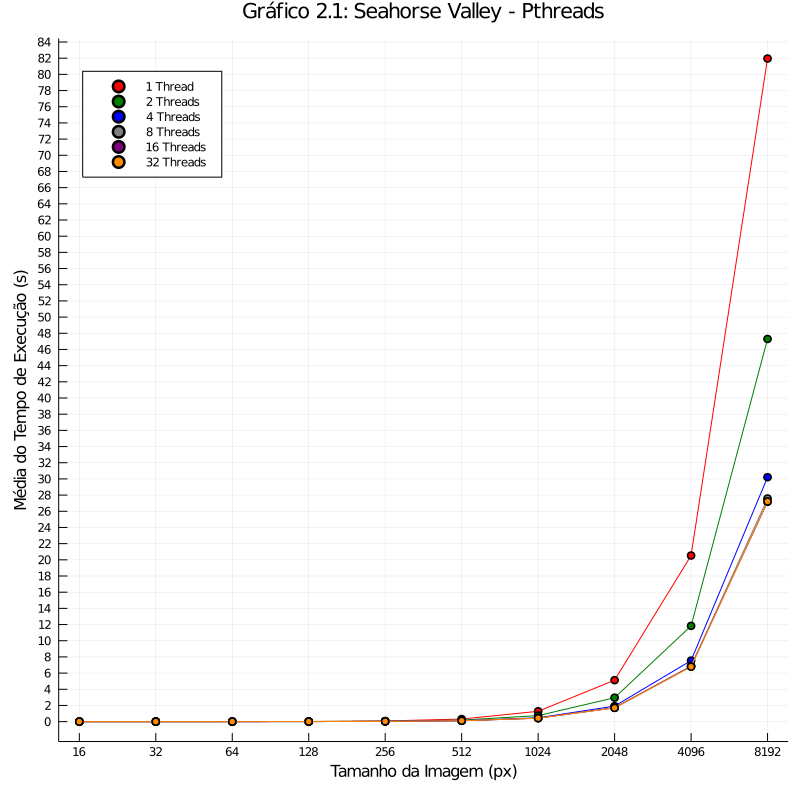

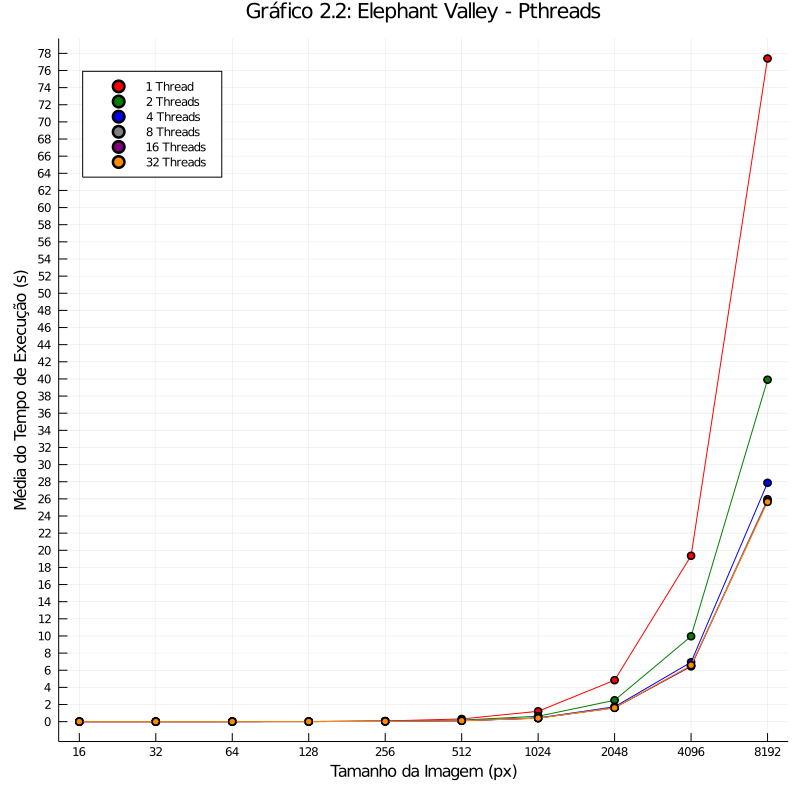

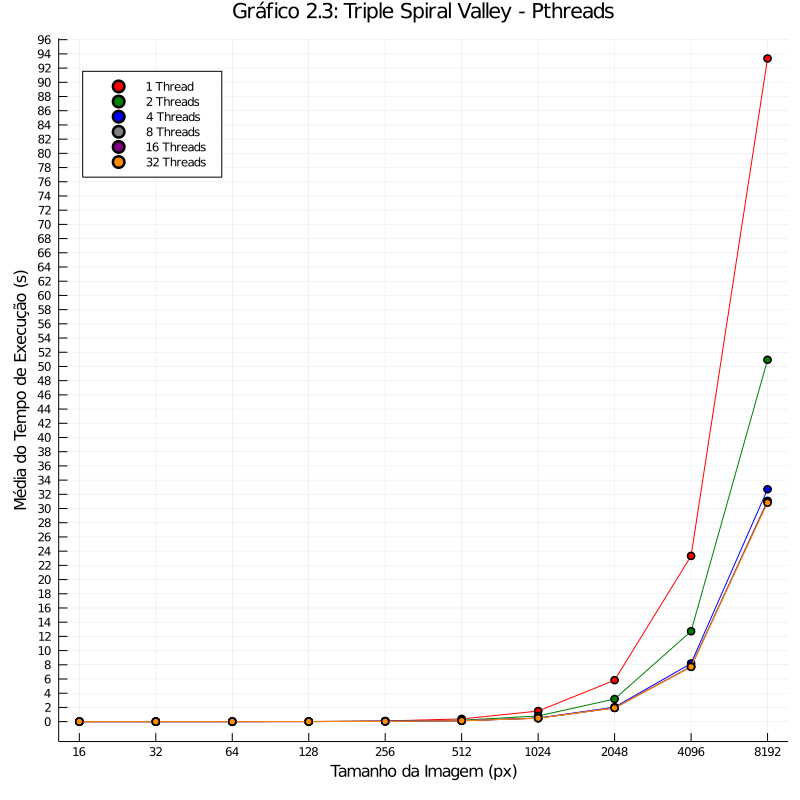

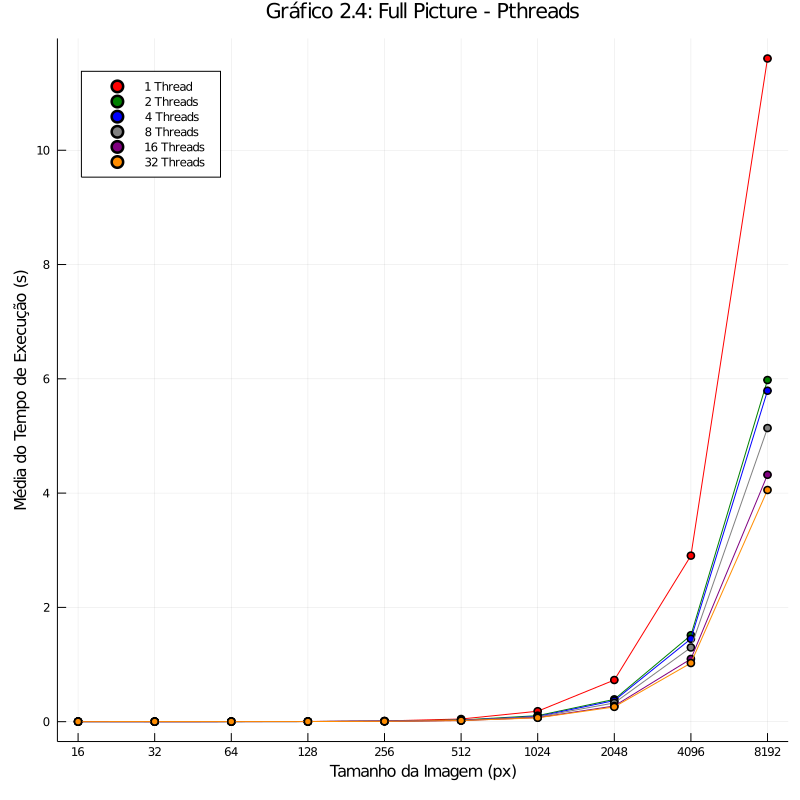

In [29]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]

seahorse = pth[pth[!, :region] .== "seahorse", :]
seahorse[!, :img_size] = string.(seahorse[!, :img_size])
display(plot_results_pth(seahorse, "Gráfico 2.1: Seahorse Valley - Pthreads", 90))

elephant = pth[pth[!, :region] .== "elephant", :]
elephant[!, :img_size] = string.(elephant[!, :img_size])
display(plot_results_pth(elephant, "Gráfico 2.2: Elephant Valley - Pthreads", 90))

triple_spiral = pth[pth[!, :region] .== "triple_spiral", :]
triple_spiral[!, :img_size] = string.(triple_spiral[!, :img_size])
display(plot_results_pth(triple_spiral, "Gráfico 2.3: Triple Spiral Valley - Pthreads", 90))

full = pth[pth[!, :region] .== "full", :]
full[!, :img_size] = string.(full[!, :img_size])
display(plot_results_pth(full, "Gráfico 2.4: Full Picture - Pthreads", 15))

Observando os gráficos é possível ver que todas as regiões seguem um comportamento semelhante em relação à interação entre as variáveis:<br>

Para os tamanhos de imagem menores, o número de threads usados não tende a afetar o tempo de execução do código. Entretanto, a partir do tamanho de imagem igual a 1024px, já é possível ver que o tempo de execução do código começa a ficar mais longo quanto menor o número de threads usados na execução. No tamanho de imagem igual a 8192px, o tempo de execução com apenas 1 thread se torna consideravelmente mais longo que os outros, chegando a ser aproximadamente 100% mais lento que a execução com 2 threads e aproximadamente 200% mais lento que a execução com 32 threads.<br>
Outro fator que é possível ser observado é que em todas as regiões com exceção da <i>Full Picture</i>, o tempo de execução do código mostrado nos gráficos para 8, 16 e 32 threads é bem próximo. Já na região <i>Full Picture</i>, os tempos se apresentam mais espaçados entre si. Esse fator pode se originar do fato de que a execução da região <i>Full Picture</i> leva bem menos tempo em relação às outras, o que faz com que o seu gráfico tenha uma escala menor e assim detalhe melhor as diferenças.

Para poder comparar melhor as diferenças entre os tempos de execução para os diferentes números de threads, serão analisados gráficos que relacionam o número de threads com as médias dos tempos de execução para um determinado tamanho de imagem. 

Para construir esses gráficos será utilizada a função <i>thr_mean_pth</i> definida abaixo. Essa função constrói um gráfico com as médias dos tempos de execução no eixo Y e os números de threads no eixo X para o determinado tamanho de imagem. 

In [31]:
function thr_mean_pth(data, name, img_size, ytick)
    fig = plot(size=(800,800), xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name, xticks = [2^x for x in 0:6], yticks = ytick)
    d = data[data[!, :img_size] .== img_size, :]
    scatter!(
        d.threads[1:size(d, 1)],
        d.mean[1:size(d, 1)],
        yerror = d.ci[1:size(d, 1)],
        label = false,
        marksersize = 100
    )        
    return fig
end

thr_mean_pth (generic function with 1 method)

Devido ao grande número de combinações possíveis, foram escolhidos apenas alguns tamanhos de imagens e de regiões para que o número de gráficos não ficasse muito alto. Como foi visto na análise anterior, a região <i>Full Picture</i> se comporta de maneira diferente do que as outras regiões, portanto ela será usada nessa análise junto com a região <i>Seahorse Valley</i>. Em relação ao tamanho de imagem, foram escolhidos os tamanhos 64px, 2048px e 8192px. 

Na célula abaixo, são construídos e apresentados os gráficos que relacionam a média do tempo de execução com o número de threads para a região <i>Seahorse Valley</i> para os tamanhos de imagem 64px, 2048px e 8192px:

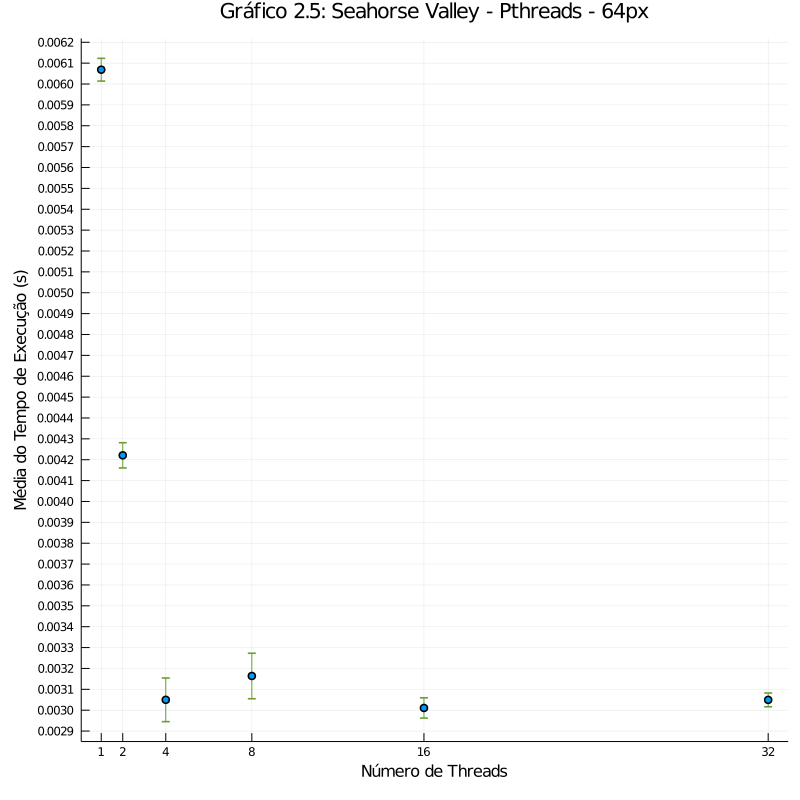

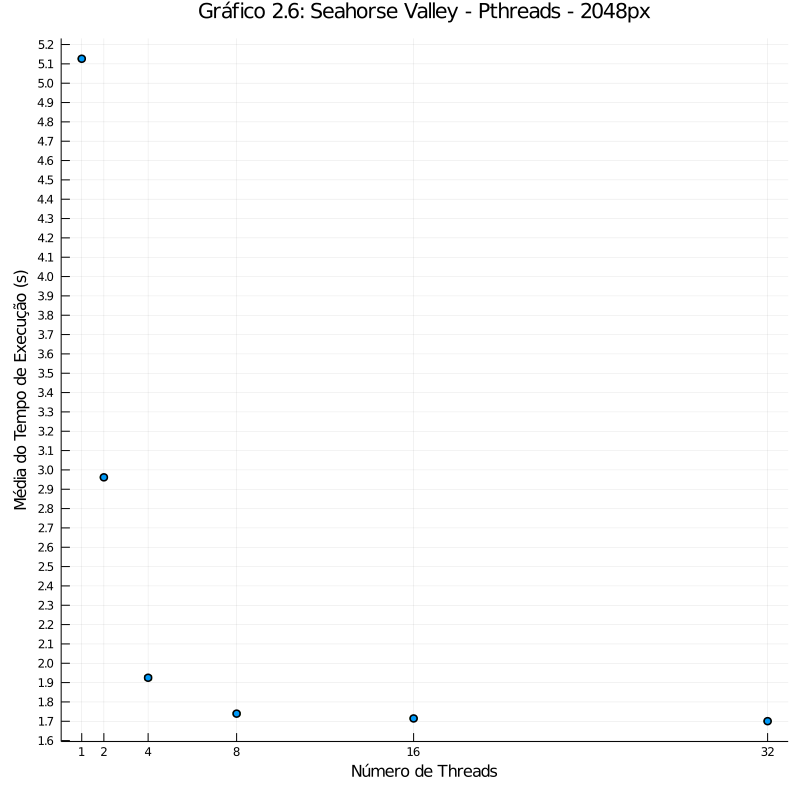

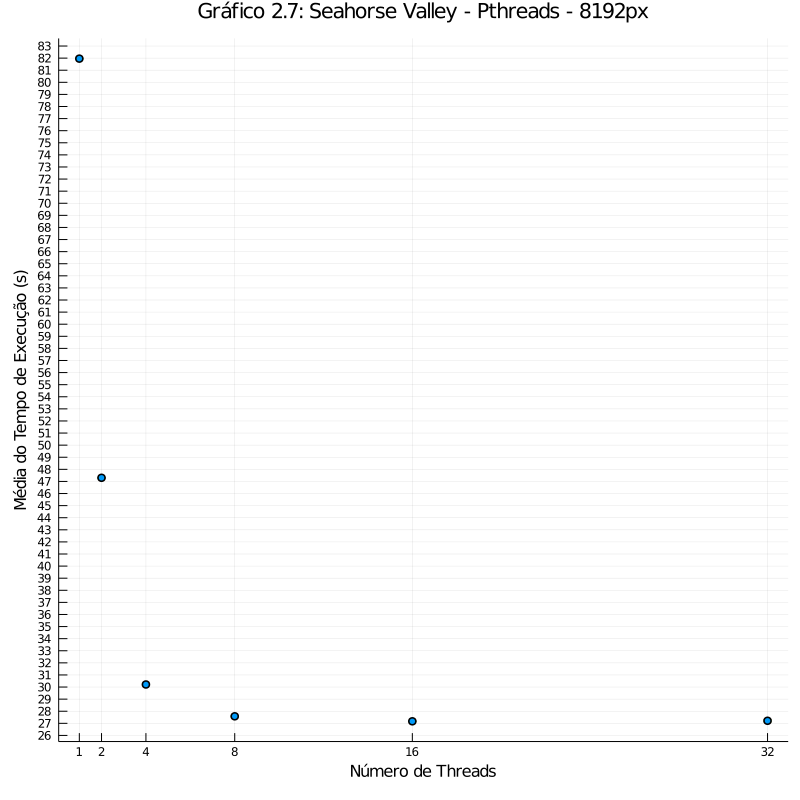

In [32]:
display(thr_mean_pth(seahorse, "Gráfico 2.5: Seahorse Valley - Pthreads - 64px", "64", 0:0.0001:0.0065))
display(thr_mean_pth(seahorse, "Gráfico 2.6: Seahorse Valley - Pthreads - 2048px", "2048", 0:0.1:7))
display(thr_mean_pth(seahorse, "Gráfico 2.7: Seahorse Valley - Pthreads - 8192px", "8192", 0:1:85))

Observando os gráficos é possível notar que para os tamanhos de imagem 2048px e 8192px, o número de threads afeta drasticamente a performance do código. Por exemplo, com 32 e 16 threads para o tamanho 8192px, o código teve uma média de tempo de execução de aproximadamente 27 segundos, enquanto para 2 threads no mesmo tamanho o código teve uma média de 47.5 segundos (aumento de ~175%). Essa grande disparidade já é notável ao comparar o uso de 2 threads com o uso de 1 thread: para o tamanho 2048px, o código com 2 threads teve uma média de tempo de execução de 2.95 segundos enquanto o código com 1 thread teve uma média de 5.1 segundos (aumento de ~172%). Essa tendência também aparece em grande parte para o tamanho de imagem 64px, porém nele é possível observar uma exceção na qual a média do tempo de execução com 8 threads é maior que a média com 4 threads, o que não acontece nos outros tamanhos de imagem onde o número de threads é sempre inversamente proporcional à media do tempo de execução.<br>
Outro detalhe que é observável nos gráficos é relacionado aos valores dos intervalos de confiança. Para o tamanho de imagem 64px, os intervalos são visíveis enquanto para os outros tamanhos maiores, os intervalos não aparecem no gráfico. Esse fator pode estar relacionado à precisão na realização dos experimentos. Para um tamanho de imagem menor, os experimentos são executados mais rapidamente, o que pode levar a medições muito pequenas e valores de desvio padrão mais altos, consequentemente levando a um intervalo de confiança maior em relação à média.

Na célula abaixo, são construídos e apresentados os gráficos que relacionam a média do tempo de execução com o número de threads para a região <i>Full Picture</i> para os tamanhos de imagem 64px, 2048px e 8192px:

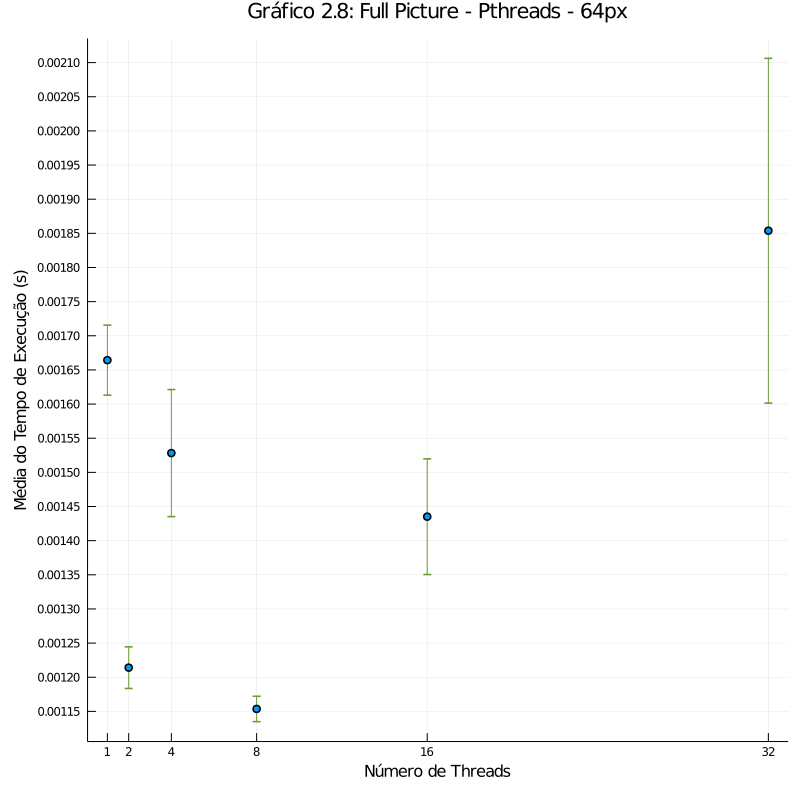

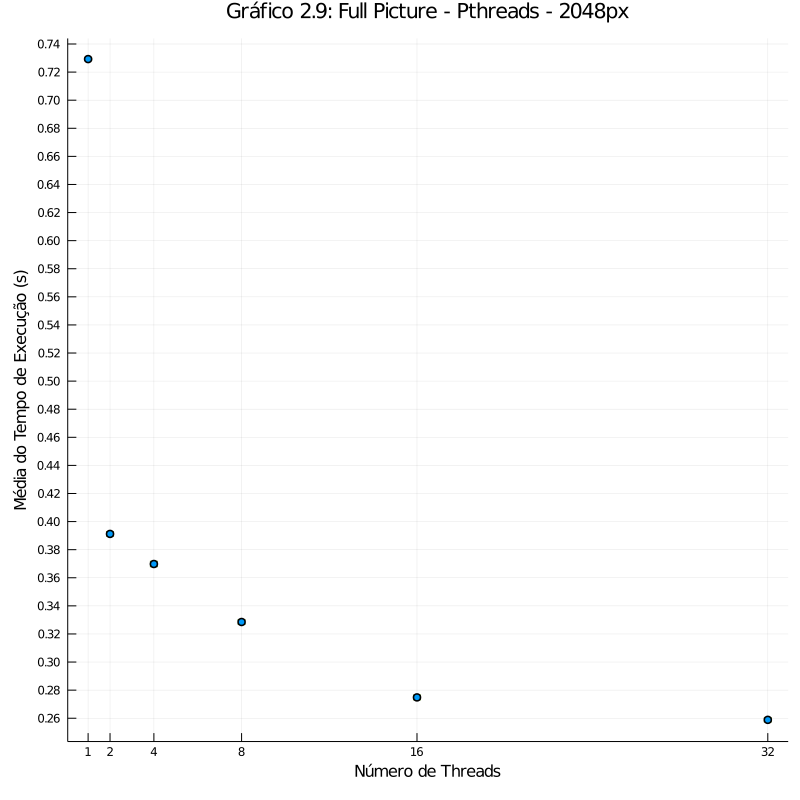

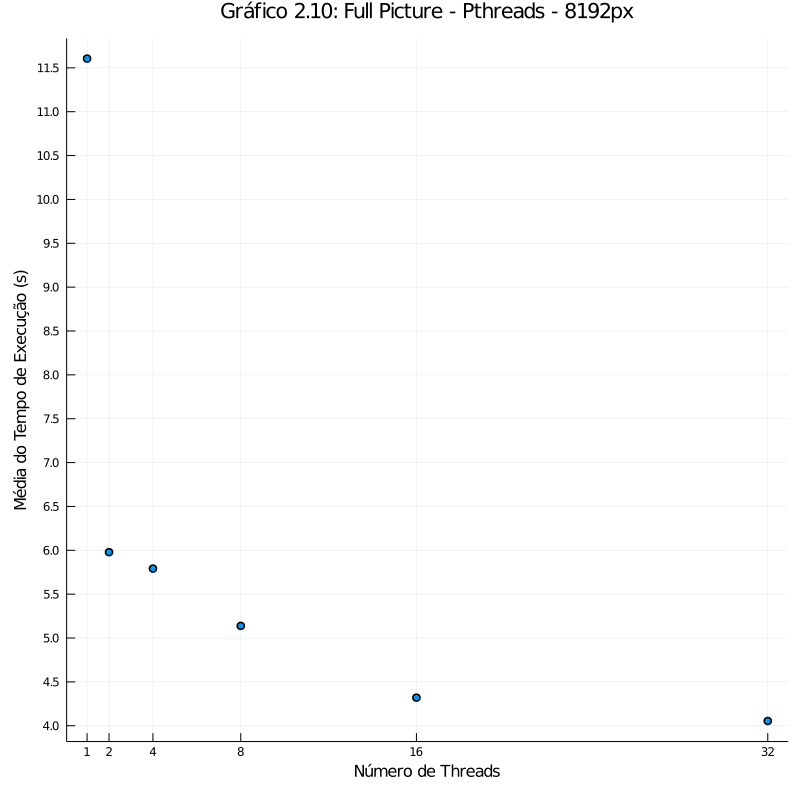

In [33]:
display(thr_mean_pth(full, "Gráfico 2.8: Full Picture - Pthreads - 64px", "64", 0:0.00005:0.0024))
display(thr_mean_pth(full, "Gráfico 2.9: Full Picture - Pthreads - 2048px", "2048", 0:0.02:0.9))
display(thr_mean_pth(full, "Gráfico 2.10: Full Picture - Pthreads - 8192px", "8192", 0:0.5:13))

Observando os gráficos é possível notar que, da mesma forma que ocorre com a região <i>Seahorse Valley</i> vista anteriormente, na região <i>Full Picture</i> para os tamanhos de imagem maiores, o número de threads é inversamente proporcional à performance do código. Por exemplo, com 32 threads para o tamanho 8192px, o código teve uma média de tempo de execução de aproximadamente 4 segundos enquanto que com 1 thread o código teve uma média de 11.6 segundos (aumento de ~290%).<br>
Outro ponto interessante que é possível visualizar no gráfico é a não existência de relação entre o número de threads e a média do tempo de execução para o tamanho de imagem 64px. Para esse tamanho, o gráfico mostra por exemplo que usando 32 threads a execução do código teve uma média de tempo de execução de aproximadamente 0.00185 segundos enquanto que para 1 thread o código teve uma média de 0.00166 segundos (diminuição de ~11%).

Uma das grandes diferenças notáveis entre os resultados das regiões <i>Full Picture</i> e <i>Seahorse Valley</i> é o intervalo dos valores das médias de tempo de execução. Por exemplo, na região <i>Seahorse Valley</i> para o tamanho de imagem 2048px, as médias possuem valores entre 1.7 e 5.2 segundos enquanto na região <i>Full Picture</i> para o mesmo tamanho, os valores das médias ficam entre 0.25 e 0.74 segundos.

Assim, após visualizar e analisar os gráficos, é possível concluir que a média do tempo de execução do código do cálculo do Conjunto de Mandelbrot paralelizado com Pthreads é inversamente proporcional ao número de threads usados na paralelização para tamanhos de imagem maiores, isto é, quanto mais threads usadas na execução do código, melhor a performance. Também é possível concluir que, independente do número de threads, quanto maior o tamanho da imagem, maior a média do tempo de execução do código e que para a região <i>Full Picture</i> o código é executado mais rapidamente do que para as outras regiões (que se comportam semelhantemente nesse aspecto), para todos as combinações de parâmetros.

### OpenMP

In [4]:
function plot_results_omp(data, name, yticksMax)   
    d1 = data[data[!, :threads] .== 1, :]
    d2 = data[data[!, :threads] .== 2, :]
    d4 = data[data[!, :threads] .== 4, :]
    d8 = data[data[!, :threads] .== 8, :]
    d16 = data[data[!, :threads] .== 16, :]
    d32 = data[data[!, :threads] .== 32, :]
    dframes = [[d1, "red", "1 Thread"], [d2, "green", "2 Threads"], [d4, "blue", "4 Threads"]
            ,[d8, "grey", "8 Threads"],[d16, "purple", "16 Threads"], [d32, "darkorange", "32 Threads"]]
    
    fig = plot(size=(800,800), xlabel = "Tamanho da Imagem (px)", ylabel = "Média do Tempo de Execução (s)",
        legend = :topleft, title = name, yticks = [x*2 for x in 0:yticksMax])
    
    for f in dframes        
        plot!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            color = f[2],
            labels = ""
        )
        scatter!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            yerror = f[1].ci[1:size(f[1], 1)],
            color = f[2],
            labels = f[3],
        )        
    end
    return fig
end 

plot_results_omp (generic function with 1 method)

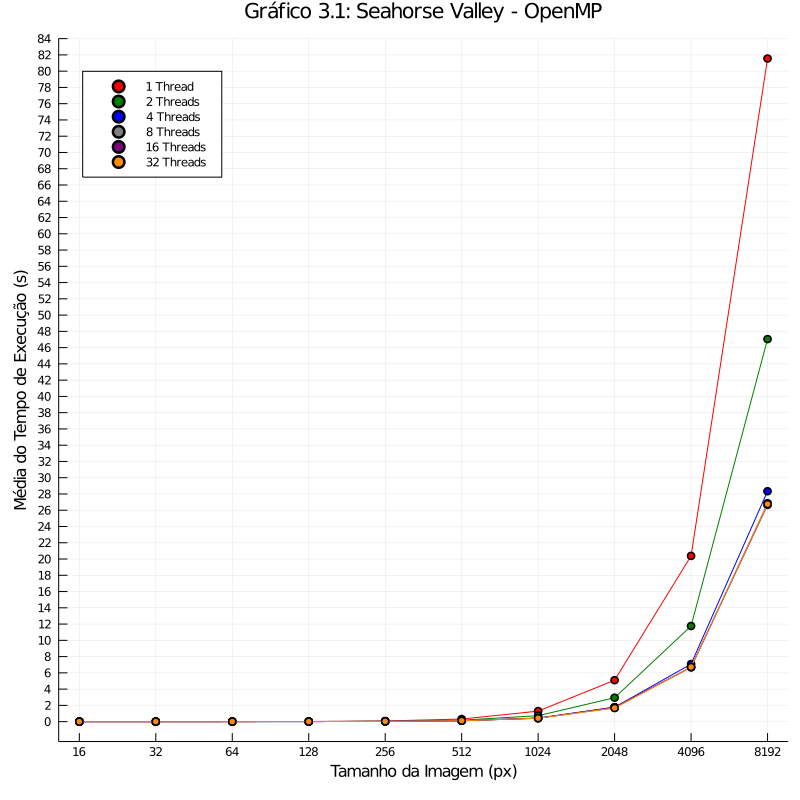

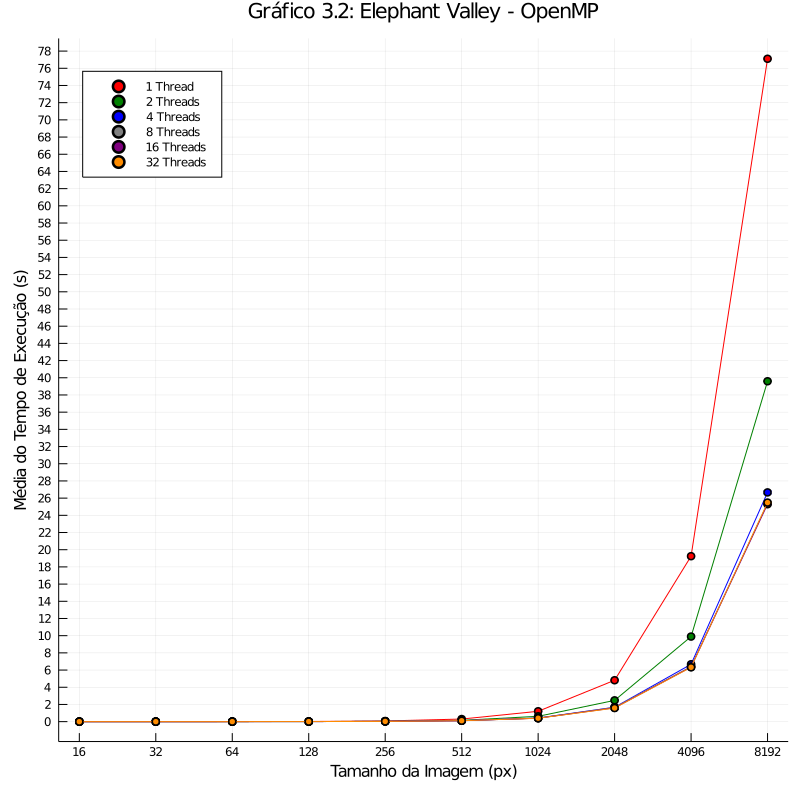

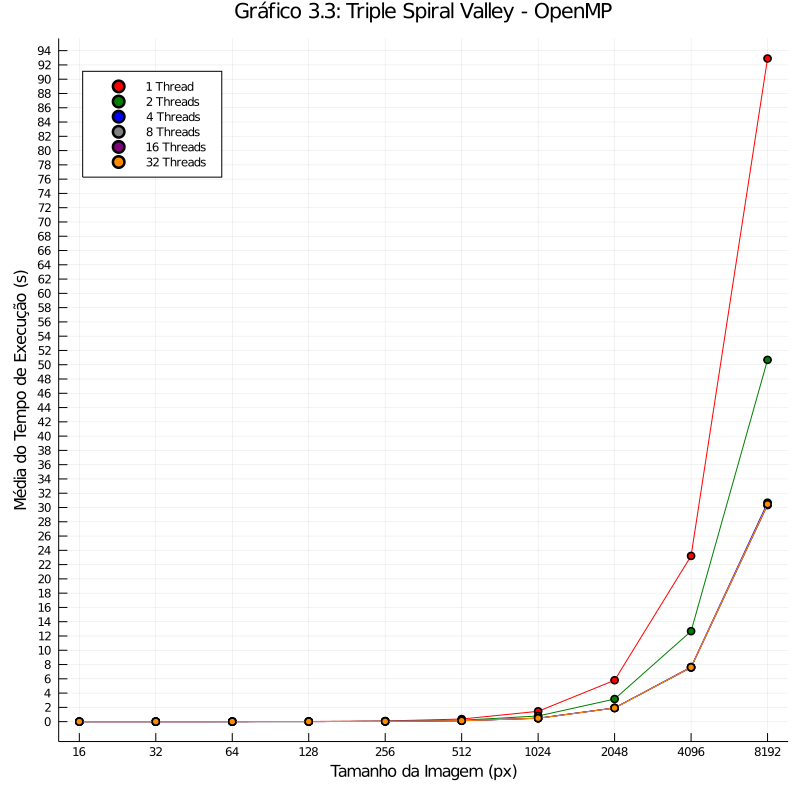

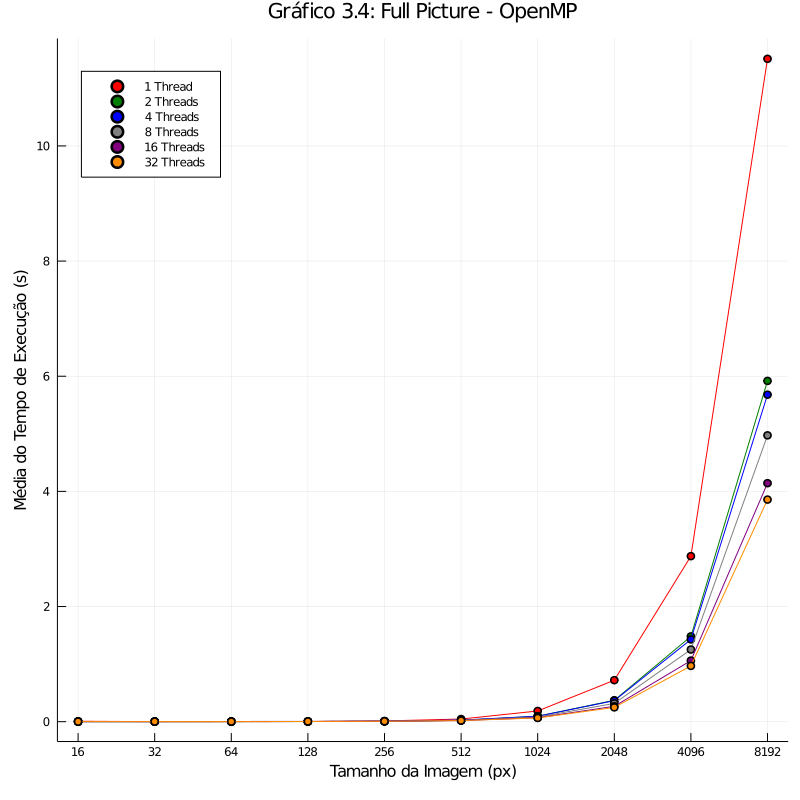

In [7]:
omp = df[df[!, :script] .== "mandelbrot_omp", :]

seahorse = omp[omp[!, :region] .== "seahorse", :]
seahorse[!, :img_size] = string.(seahorse[!, :img_size])
display(plot_results_omp(seahorse, "Gráfico 3.1: Seahorse Valley - OpenMP", 90))

elephant = omp[omp[!, :region] .== "elephant", :]
elephant[!, :img_size] = string.(elephant[!, :img_size])
display(plot_results_omp(elephant, "Gráfico 3.2: Elephant Valley - OpenMP", 90))

triple_spiral = omp[omp[!, :region] .== "triple_spiral", :]
triple_spiral[!, :img_size] = string.(triple_spiral[!, :img_size])
display(plot_results_omp(triple_spiral, "Gráfico 3.3: Triple Spiral Valley - OpenMP", 90))

full = omp[omp[!, :region] .== "full", :]
full[!, :img_size] = string.(full[!, :img_size])
display(plot_results_omp(full, "Gráfico 3.4: Full Picture - OpenMP", 15))

Analisando os gráficos acima do OpenMP, percebemos que a região <i>Triple Spiral Valley</i> possui os maiores valores de tempo médio de execução em relação às outras regiões, seguido da <i>Seahorse Valley</i>, <i>Elephant Valley</i> e <i>Full Picture</i>. Além disso, vemos que todas as regiões também seguem um padrão semelhante ao analisarmos o tamanho da imagem com o tempo médio de execução:<br>

Sob o ponto de vista da quantidade de threads, percebemos que o tempo médio de execução não sofre alterações consideráveis para pequenas imagens, fato esse que nos levou a plotar o gráfico dessa maneira, evidenciando apenas os dados mais relevantes. Nota-se também pelo gráfico que, a partir de 1024px, essa diferença no tempo médio se mostra mais perceptível, mas seguindo o mesmo padrão: a média do tempo de execução é maior quando utilizamos apenas uma thread e que essa média decai à medida que aumentamos o número de threads. A maior diferença se encontra na imagem de tamanho igual a 8192px, em que o tempo de execução para 1 thread chega a ser, aproximadamente, o dobro e o triplo ao compararmos com o tempo para 2 e 32 threads respectivamente.<br>

É possível observamos que, diferente das outras regiões, na <i>Full Picture</i>, o tempo médio de execução se mostrou mais espaçoso entre as threads. Como falado anteriormente, a execução da região <i>Full Picture</i> teve menor tempo médio em relação às outras, acarretando uma diminuição de escala e uma diferença mais folgada entre os tempos para cada thread.

Assim como fizemos para o Pthreads, iremos construir gráficos analisando o número de threads com o tempo de execução para melhor observarmos a relação entre essas duas variáveis. Para fins comparativos com a Pthreads, também foram escolhidas as regiões <i>Seahorse Valley</i> e <i>Full Picture</i>, além dos tamanhos de imagem 64px, 2048px e 8192px.

In [8]:
function thr_mean_omp(data, name, img_size, ytick)
    fig = plot(size=(800,800), xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name, xticks = [2^x for x in 0:6], yticks = ytick)
    d = data[data[!, :img_size] .== img_size, :]
    scatter!(
        d.threads[1:size(d, 1)],
        d.mean[1:size(d, 1)],
        yerror = d.ci[1:size(d, 1)],
        label = false,
        marksersize = 100
    )        
    return fig
end

thr_mean_omp (generic function with 1 method)

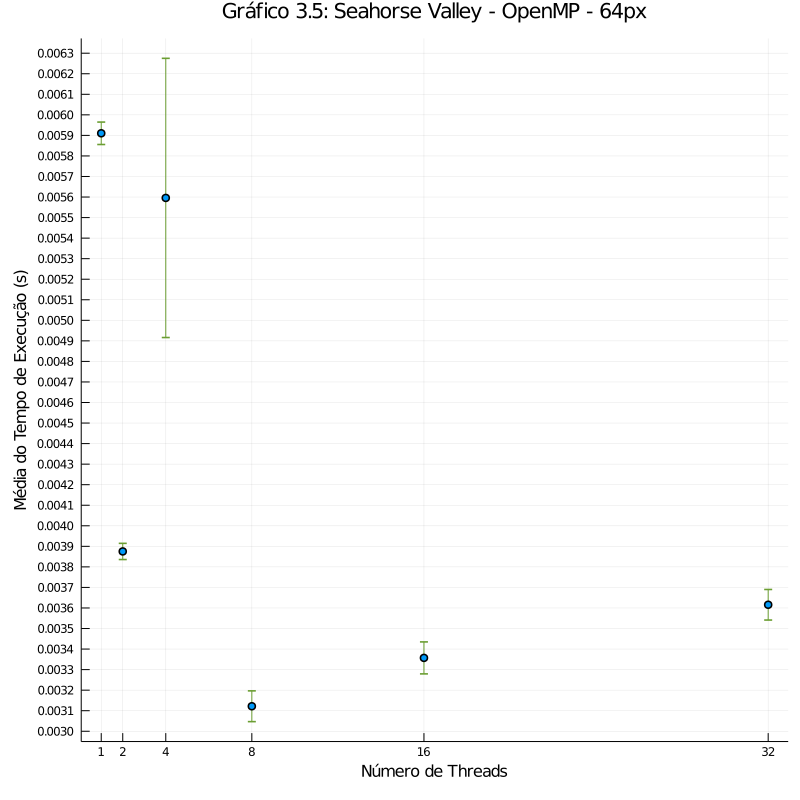

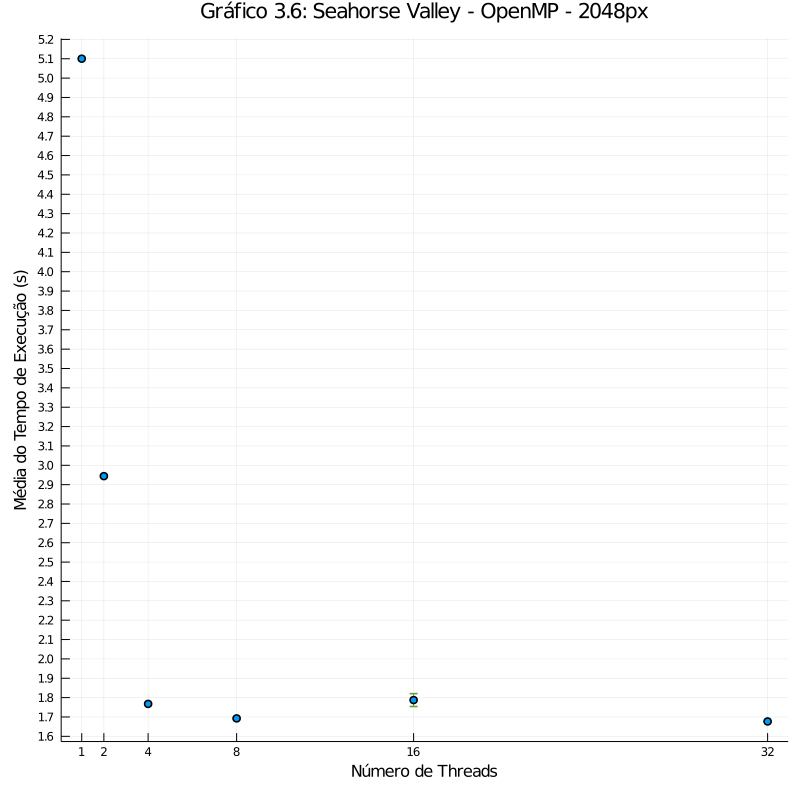

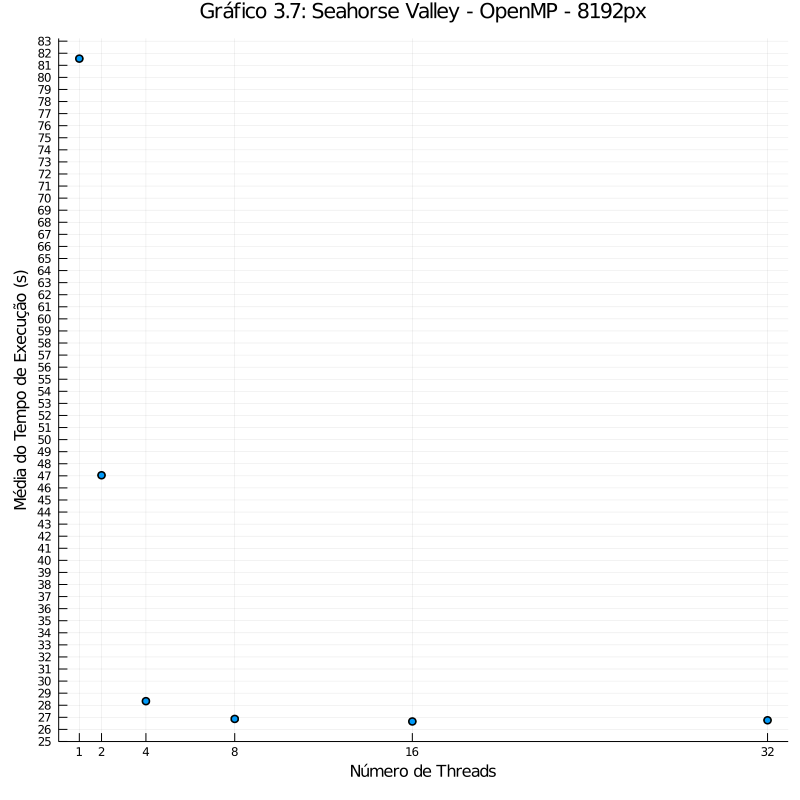

In [9]:
display(thr_mean_omp(seahorse, "Gráfico 3.5: Seahorse Valley - OpenMP - 64px", "64", 0:0.0001:0.0065))
display(thr_mean_omp(seahorse, "Gráfico 3.6: Seahorse Valley - OpenMP - 2048px", "2048", 0:0.1:7))
display(thr_mean_omp(seahorse, "Gráfico 3.7: Seahorse Valley - OpenMP - 8192px", "8192", 0:1:85))

De acordo com estes gráficos sobre a região <i>Seahorse Valley</i>, também notamos o tempo médio de execução elevado para 1 e 2 threads independente do tamanho da imagem. Se pegarmos a imagem 2048px como exemplo, percebemos que, para 2 threads, tivemos uma média de 2.95s contra 5.1s obtida para 1 thread (aumento de ~72%). Já analisando de 8 a 32 threads, percebemos que os valores obtidos flutuam bastante, sofrendo pequenas variações na média do tempo de execução. Como exemplo, podemos analisar os valores para a imagem de 8192px, em que obtivemos tempo médio aproximado de 26.8s para 32 threads contra 27s para 8 threads (aumento de ~0.7%).

É notório mencionarmos que, na imagem de 64px, houve um aumento não esperado no tempo médio de execução com 4 threads que, de acordo com o tamanho do intervalo de confiança obtido, pudemos supor que houve algum valor considerado <i>outlier</i> dentre as 10 iterações realizadas que puxou a média para cima. 

Analisando os intervalos de confiança, percebemos que, para a imagem de 64px, alcançamos intervalos mais visíveis no gráfico, diferente do que acontece nos de outros tamanhos. Como dito anteriormente, uma possível explicação encontra-se na precisão durante a realização dos experimentos, os quais possuem tempo médio de execução menor em imagens pequenas. Com isso, acaba-se gerando desvios padrões maiores, acarretando em intervalos de confiança maiores em relação à média.

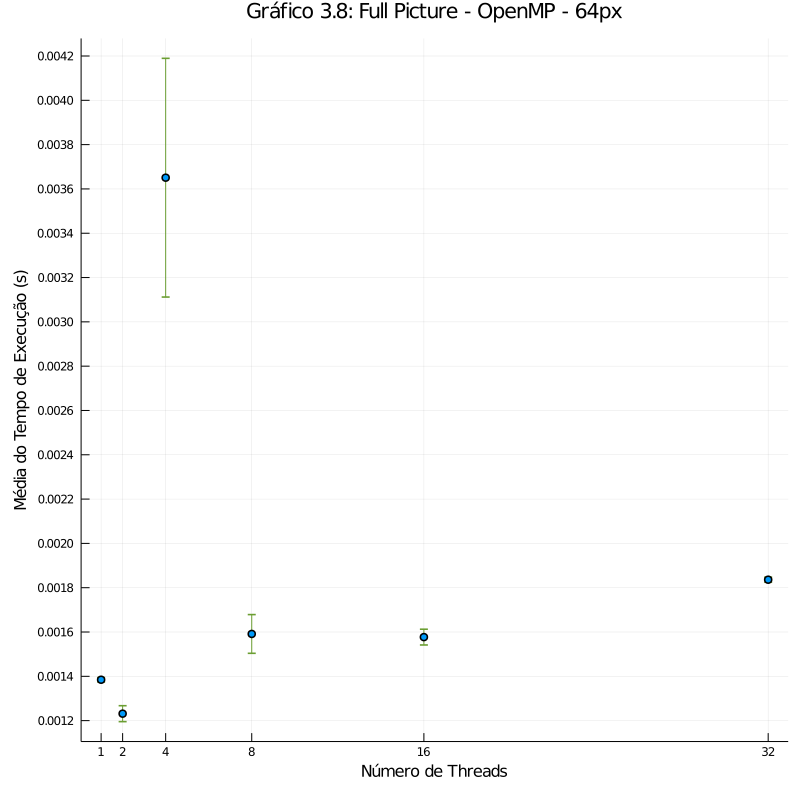

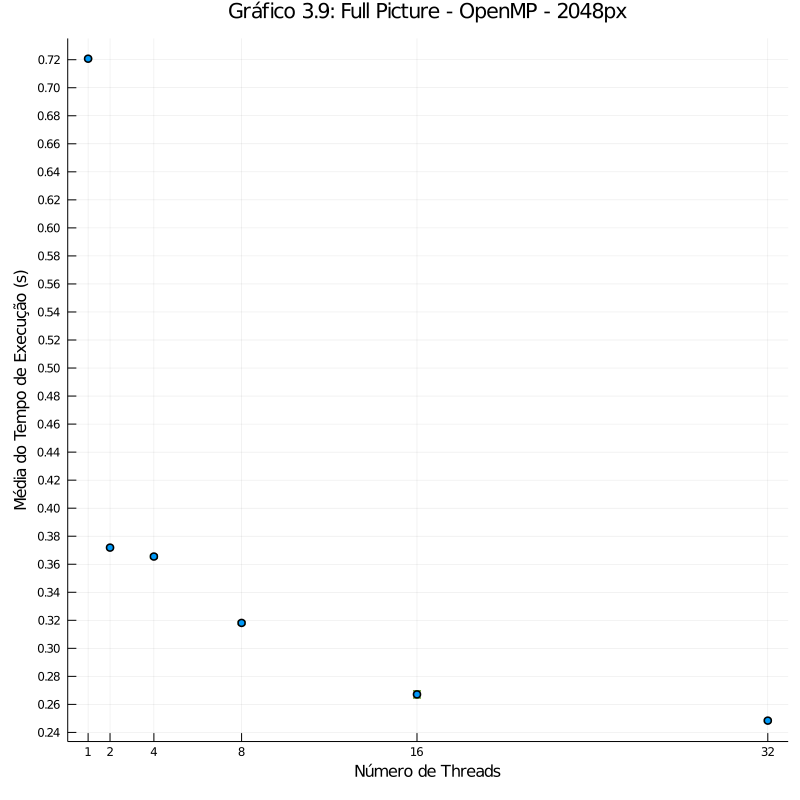

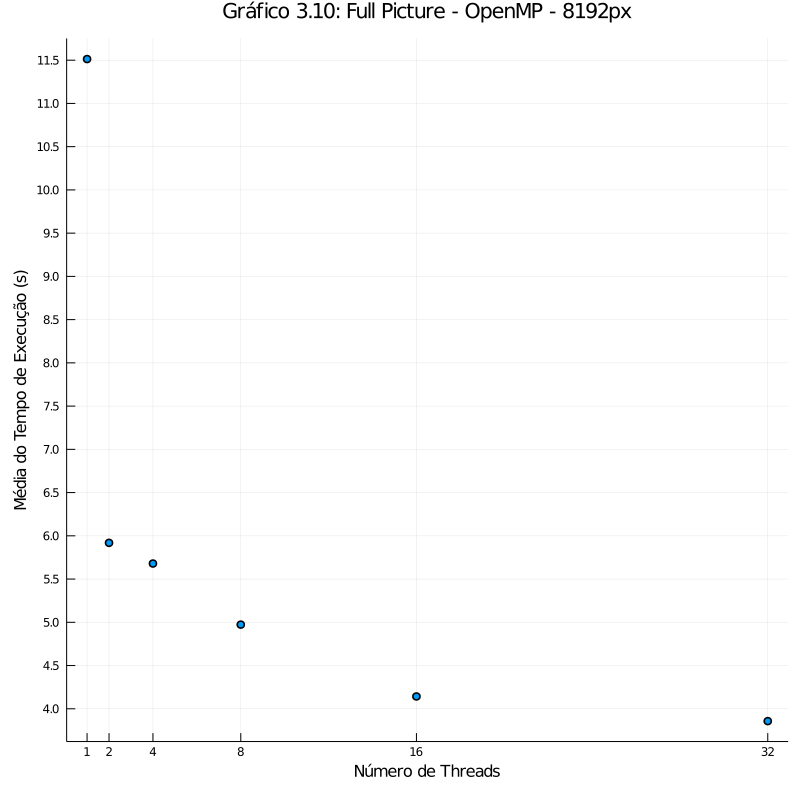

In [10]:
display(thr_mean_omp(full, "Gráfico 3.8: Full Picture - OpenMP - 64px", "64", 0:0.0002:0.005))
display(thr_mean_omp(full, "Gráfico 3.9: Full Picture - OpenMP - 2048px", "2048", 0:0.02:0.9))
display(thr_mean_omp(full, "Gráfico 3.10: Full Picture - OpenMP - 8192px", "8192", 0:0.5:13))

Analisando a região <i>Full Picture</i>, pudemos perceber que, para as imagens de 2048px e 8192px, tivemos uma queda no tempo de execução à medida que aumentamos o número de threads. Além disso, em comparação com o <i>Seahorse Valley</i>, também obtivemos valores menores nos tempos médios ao analisarmos as mesmas condições (número de threads e tamanho da imagem). 

Em relação aos valores obtidos, iremos analisar a figura 2048px como exemplo, em que o tempo para 1 thread foi de 0.72s contra 0.37s de 2 thread (uma queda de 49%). Já fazendo uma comparação entre 8 e 32 threads, tivemos 0.32s para a de 8 threads contra 0.25s para a de 32 threads (uma queda de 22%).

Já para a imagem de 64px, não tivemos um padrão aparente, onde podemos observar tempos baixos para as threads 1 e 2 diferente do usual. Analisando seus valores, obtivemos 0.018s para 32 threads contra 0.014 de 1 thread (uma queda de ~32%).


Portanto, sobre a paralelização OpenMP, podemos perceber que o tempo médio de execução decai à medida que aumentamos o número de threads nas maiores imagens. Além disso, também percebemos que o tempo médio aumenta quanto maior for a imagem e que esse fato independe do número de threads, ou seja, a região <i>Full Picture</i> de 8196px com 32 threads levou mais tempo pra ser executada que a de 2048px com 1 thread (4s contra 0.72s respectivamente).

### Relação entre os Códigos Paralelizados

Levando em conta que a execução do código sequencial sem operações de I/O e sem alocação de memória é equivalente à execução dos códigos paralelizados com o número de threads igual a 1 e observando os resultados analisados, é possível concluir que para execuções com números de threads maiores que 1, a performance de ambos os códigos paralelizados é claramente melhor do que a performance do código sequencial em todas as regiões do Conjunto de Mandelbrot para os tamanhos de imagens consideráveis.

Assim, não é possível comparar todos os códigos entre si em relação ao número de threads. Porém, é possível comparar nesse aspecto as médias dos tempos de execução do código paralelizado com Pthreads com o código paralelizado com OpenMP.

Para comparar os códigos paralelizados em relação às threads será utilizada a função <i>omp_pth</i> definida abaixo, que recebe as partições do dataframe relacionadas aos códigos para um determinado tamanho de imagem e constrói os gráficos relacionando a média do tempo de execução no eixo Y com o número de threads no eixo X para cada região do Conjunto de Mandelbrot de ambos os códigos.

In [34]:
function omp_pth(pth, omp, region, name, ytick)
    pth_aux = pth[pth[!, :region] .== region, :]
    omp_aux = omp[omp[!, :region] .== region, :]
    fig = plot(xlabel="Número de Threads", ylabel="Média do Tempo de Execução (s)", legend=:topright, title=name,
            xticks=[2^x for x in 0:6], yticks=ytick)
    scatter!(
        pth_aux.threads[1:size(pth_aux, 1)],
        pth_aux.mean[1:size(pth_aux, 1)],
        yerror = pth_aux.ci[1:size(pth_aux, 1)],
        color = "red",
        labels = "Pthreads"
    )
    scatter!(
        omp_aux.threads[1:size(omp_aux, 1)],
        omp_aux.mean[1:size(omp_aux, 1)],
        yerror = omp_aux.ci[1:size(omp_aux, 1)],
        color = "blue",
        labels = "OpenMP"
    )
    return fig
end

omp_pth (generic function with 1 method)

Nas células abaixo são construídos e apresentados os gráficos que relacionam os códigos paralelizados em relação ao número de threads para todas as regiões do Conjunto de Mandelbrot para os tamanhos de imagem 64px, 4096px e 8192px:

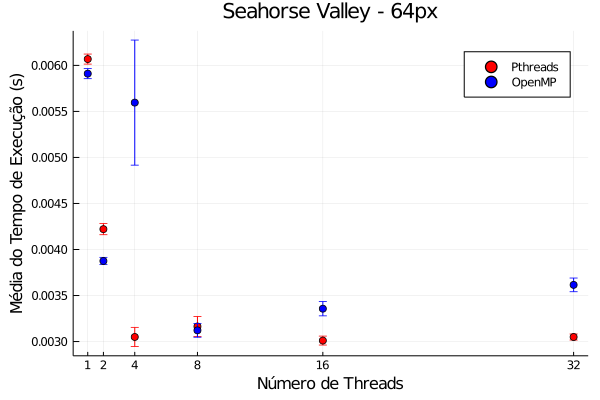

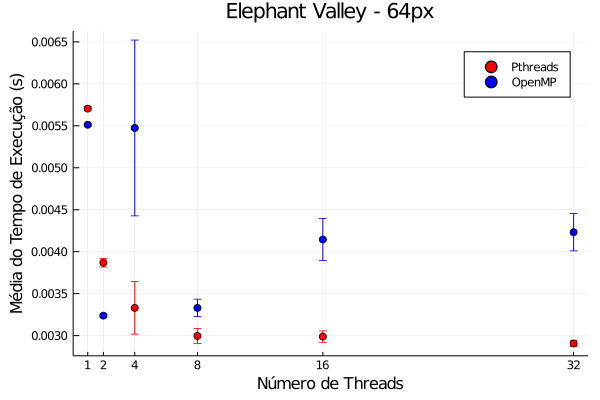

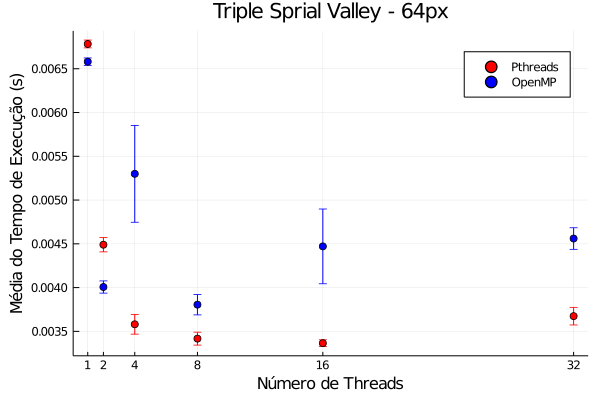

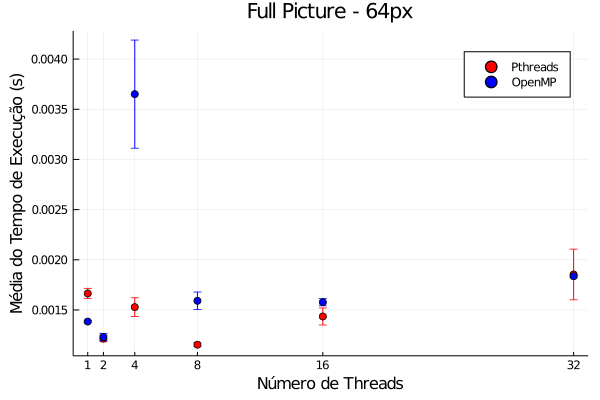

In [35]:
omp = df[df[!, :script] .== "mandelbrot_omp", :]
pth_i = pth[pth[!, :img_size] .== 64, :]
omp_i = omp[omp[!, :img_size] .== 64, :]

display(omp_pth(pth_i, omp_i, "seahorse", "Seahorse Valley - 64px", 0:0.0005:0.01))
display(omp_pth(pth_i, omp_i, "elephant", "Elephant Valley - 64px", 0:0.0005:0.01))
display(omp_pth(pth_i, omp_i, "triple_spiral", "Triple Sprial Valley - 64px", 0:0.0005:0.01))
display(omp_pth(pth_i, omp_i, "full", "Full Picture - 64px", 0:0.0005:0.009))

Observando os resultados dos gráficos é possível visualizar que para o tamanho de imagem 64px não parece haver um padrão nas diferenças de performance da execução do cálculo do Conjunto de Mandelbrot entre o código paralelizado com Pthreads e o código paralelizado com OpenMP em nenhuma das regiões. Também é possível visualizar que em certas combinações de números de threads com região, a média do tempo de execução é maior no código com Pthreads do que no código com OpenMP (e.g. 2 threads na região <i>Seahorse</i>) enquanto em outras ocorre o inverso (e.g. 4 threads na região <i>Full Picture</i>).

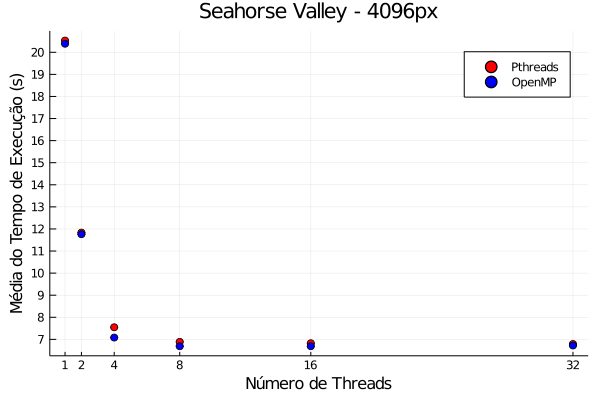

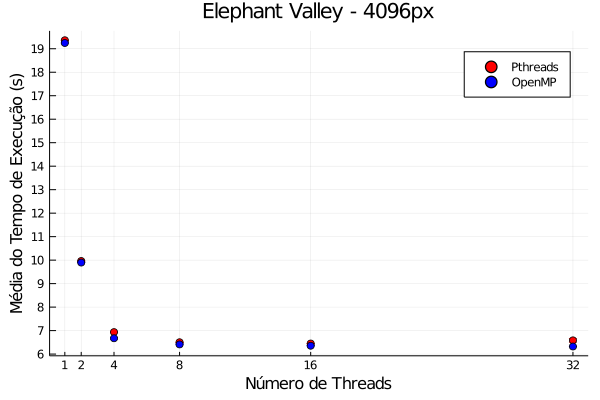

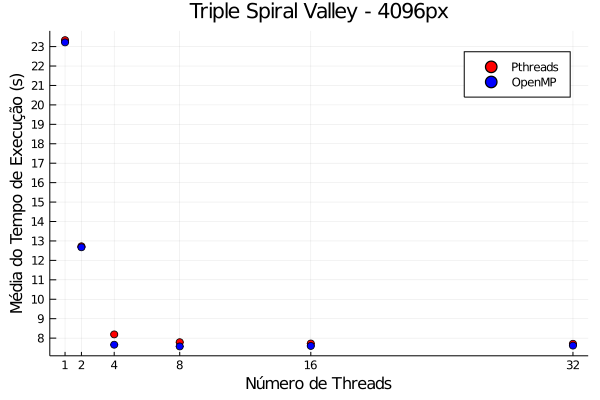

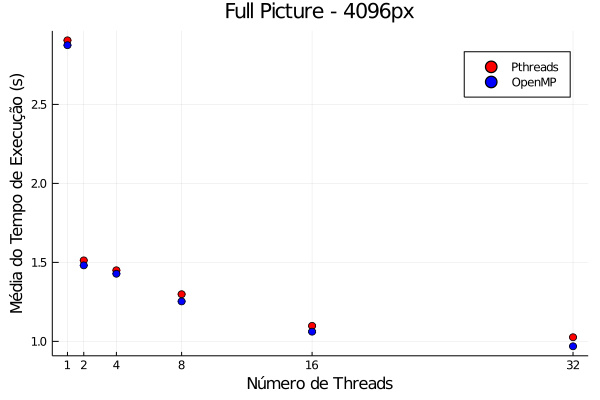

In [36]:
pth_i = pth[pth[!, :img_size] .== 4096, :]
omp_i = omp[omp[!, :img_size] .== 4096, :]

display(omp_pth(pth_i, omp_i, "seahorse", "Seahorse Valley - 4096px", 5:25))
display(omp_pth(pth_i, omp_i, "elephant", "Elephant Valley - 4096px", 5:25))
display(omp_pth(pth_i, omp_i, "triple_spiral", "Triple Spiral Valley - 4096px", 5:25))
display(omp_pth(pth_i, omp_i, "full", "Full Picture - 4096px", 0:0.5:4))

Observando o resultado dos gráficos é possível visualizar que para o tamanho de imagem 4096px, em todas as regiões do Conjunto de Mandelbrot o comportamento das médias do tempo de execução do código paralelizado com Pthreads é bem semelhante ao comportamento das médias do código paralelizado com OpenMP.<br>
Além disso, é possível verificar que em nenhum dos casos a média do tempo de execução do código com Pthreads é menor que a média do código com OpenMP, isto é, a média do código com OpenMP é sempre menor ou equivalente à do código com Pthreads.

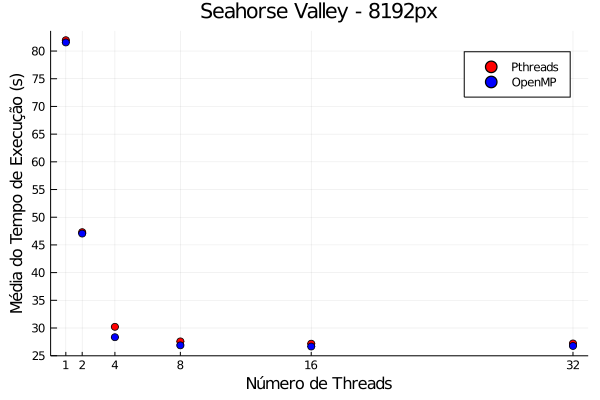

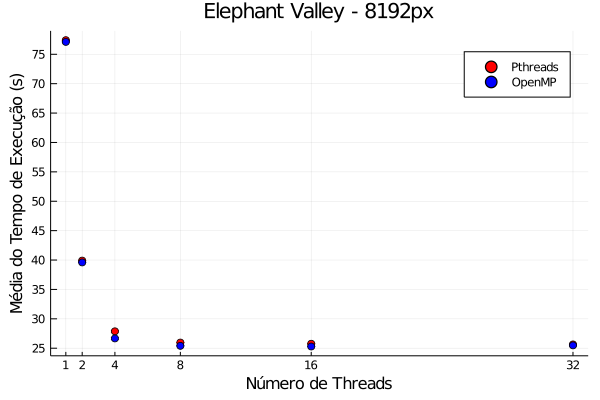

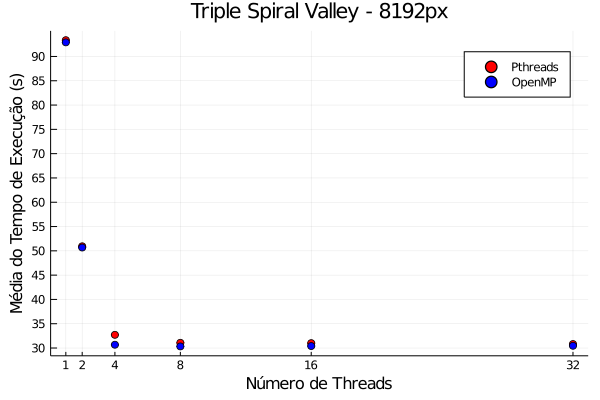

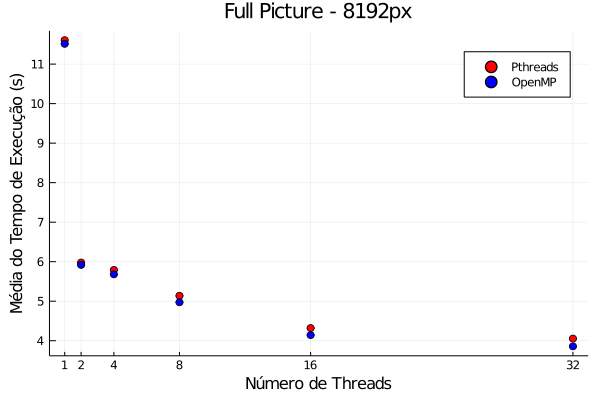

In [37]:
pth_i = pth[pth[!, :img_size] .== 8192, :]
omp_i = omp[omp[!, :img_size] .== 8192, :]

display(omp_pth(pth_i, omp_i, "seahorse", "Seahorse Valley - 8192px", 25:5:90))
display(omp_pth(pth_i, omp_i, "elephant", "Elephant Valley - 8192px", 25:5:90))
display(omp_pth(pth_i, omp_i, "triple_spiral", "Triple Spiral Valley - 8192px", 25:5:90))
display(omp_pth(pth_i, omp_i, "full", "Full Picture - 8192px", 2:15))

Observando o resultado dos gráficos é possível visualizar que para o tamanho de imagem 8192px, da mesma forma que ocorre com o tamanho de imagem de 4096px, em todas as regiões do Conjunto de Mandelbrot o comportamento das médias do tempo de execução do código paralelizado com Pthreads é semelhante ao comportamento das médias do código paralelizado com OpenMP.<br>
Além disso, da mesma forma que com o tamanho de imagem de 4096px, em nenhum caso a média do tempo de execução do código paralelizado com Pthreads é menor que a média do código paralelizado com OpenMP.

Assim, podemos concluir que para tamanhos maiores de imagem, o código paralelizado com OpenMP tem uma performance levemente melhor que o código paralelizado com Pthreads em todos os números de threads e regiões. Também podemos dizer que para tamanhos muito pequenos de imagem, não parece haver uma vantagem explícita entre os dois tipos de códigos paralelizados quanto às regiões do Conjunto de Mandelbrot e também que não parece haver algum padrão de melhora na performance quanto ao número de threads nos dois códigos.